In [1]:
from google.colab import drive

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filestamp = "1711835043"

In [4]:
newstest = pd.read_json(f'/content/drive/MyDrive/Thesis data/relevant_selection/{filestamp}_news_test.json')['result_1'].values
twittertest = pd.read_json(f'/content/drive/MyDrive/Thesis data/relevant_selection/{filestamp}_twitter_test.json')['result_1'].values
mixtest = pd.read_json(f'/content/drive/MyDrive/Thesis data/relevant_selection/{filestamp}_mix_test.json')['result_1'].values

In [5]:
# Clean the responses from the model
def result_cleaning(data_list, actual_list):
  results = []
  adjust_counter = 0
  for i in range(len(data_list)):
    response = data_list[i]
    if type(response) != str:
      response = 'INVALID'
    if "UP" in response.upper():
      results.append("UP")
    elif "P" in response.upper():
      results.append("UP")
    elif "DOWN" in response.upper():
      results.append("DOWN")
    elif "DOW" in response.upper():
      results.append("DOWN")
    elif actual_list[i] == "UP":
      results.append('DOWN')
      adjust_counter += 1
    else:
      results.append("UP")
      adjust_counter += 1
  print(f'Numer of changes made: {adjust_counter}')
  return results

In [8]:
# Get the metrics for the results
def score(y_pred, y_true, file):
  y_pred_clean = result_cleaning(y_pred, y_true)
  print(sum(y_pred_clean == y_pred), len(y_pred))
  print(f"f1_score{f1_score(y_true, y_pred_clean, pos_label='UP', average='binary')}")
  print(f"Accuracy: {accuracy_score(y_true, y_pred_clean)}")
  print(f"precision pos: {precision_score(y_true, y_pred_clean, pos_label='UP', average='binary')}")
  print(f"precision neg: {precision_score(y_true, y_pred_clean, pos_label='DOWN', average='binary')}")
  print(f"recall pos: {recall_score(y_true, y_pred_clean, pos_label='UP', average='binary')}")
  print(f"recall neg: {recall_score(y_true, y_pred_clean, pos_label='DOWN', average='binary')}")

  ConfusionMatrixDisplay.from_predictions(y_true, y_pred_clean, labels=['UP','DOWN'])
  plt.savefig(f'/content/drive/MyDrive/Thesis figures/{file}')
  plt.show()


PHI2 twitter base

Numer of changes made: 3
0 200
f1_score0.61003861003861
Accuracy: 0.495
precision pos: 0.4968553459119497
precision neg: 0.4878048780487805
recall pos: 0.79
recall neg: 0.2


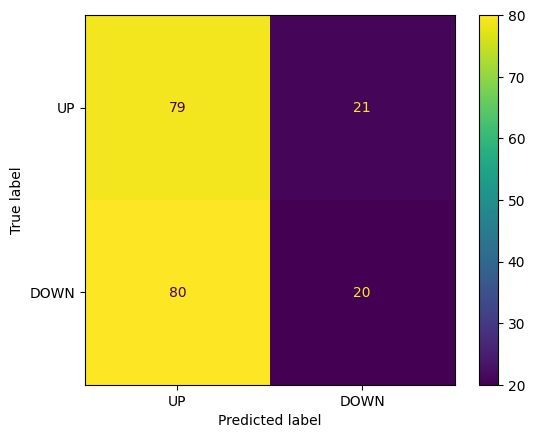

In [ ]:
twitterphi2base = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_twitter_microsoft_phi_2.csv')['base'].values
score(twitterphi2base, twittertest, f'{filestamp}_twitterphi2base')

PHI2 twitter base + adapter

Numer of changes made: 0
0 200
f1_score0.588235294117647
Accuracy: 0.545
precision pos: 0.5371900826446281
precision neg: 0.5569620253164557
recall pos: 0.65
recall neg: 0.44


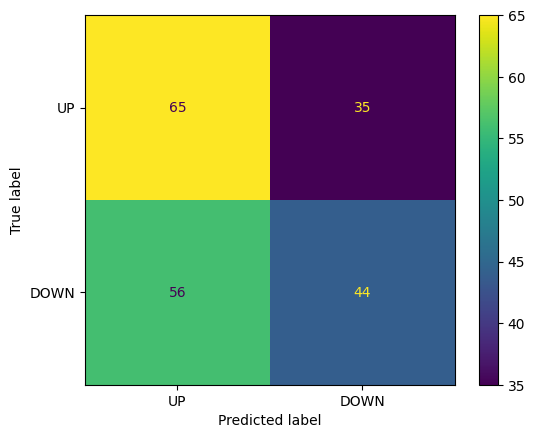

In [ ]:
twitterphi2adapter = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_twitter_microsoft_phi_2_adapter.csv')['trained'].values
score(twitterphi2adapter, twittertest, f'{filestamp}_twitterphi2adapter')

PHI2 twitter quantized base

Numer of changes made: 2
0 200
f1_score0.5795918367346939
Accuracy: 0.485
precision pos: 0.4896551724137931
precision neg: 0.4727272727272727
recall pos: 0.71
recall neg: 0.26


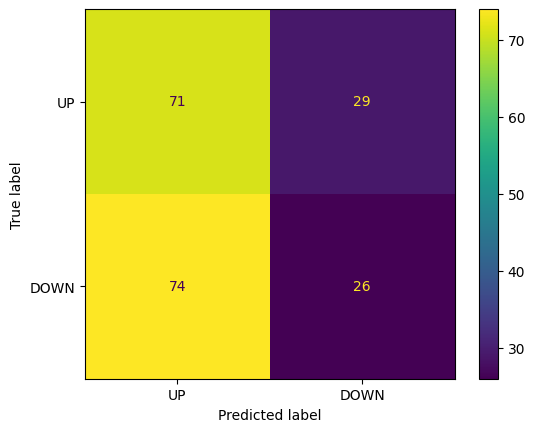

In [ ]:
twitterphi2qbase = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_twitter_qmicrosoft_phi_2.csv')['base'].values
score(twitterphi2qbase, twittertest, f'{filestamp}_twitterphi2qbase')

PHI2 twitter quantized base + adapter

Numer of changes made: 0
0 200
f1_score0.4918032786885245
Accuracy: 0.535
precision pos: 0.5421686746987951
precision neg: 0.5299145299145299
recall pos: 0.45
recall neg: 0.62


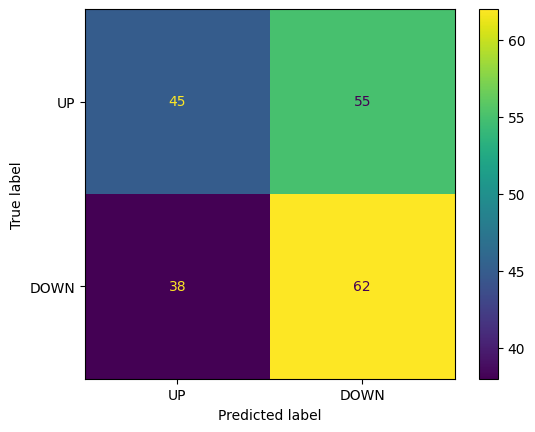

In [ ]:
twitterphi2qadapter = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_twitter_qmicrosoft_phi_2_adapter.csv')['trained'].values
score(twitterphi2qadapter, twittertest, f'{filestamp}_twitterphi2qadapter')

GPT4 twitter zeroshot

Numer of changes made: 45
155 200
f1_score0.4935064935064935
Accuracy: 0.415
precision pos: 0.4351145038167939
precision neg: 0.37681159420289856
recall pos: 0.57
recall neg: 0.26


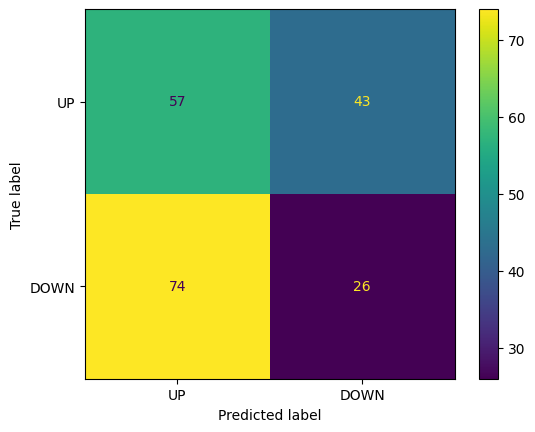

In [ ]:
twitter4zero = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_twitter_gpt_4.csv')['zero_shot'].values
score(twitter4zero, twittertest, f'{filestamp}_twitter4zero')

GPT4 twitter twoshot

Numer of changes made: 0
200 200
f1_score0.6198347107438016
Accuracy: 0.54
precision pos: 0.528169014084507
precision neg: 0.5689655172413793
recall pos: 0.75
recall neg: 0.33


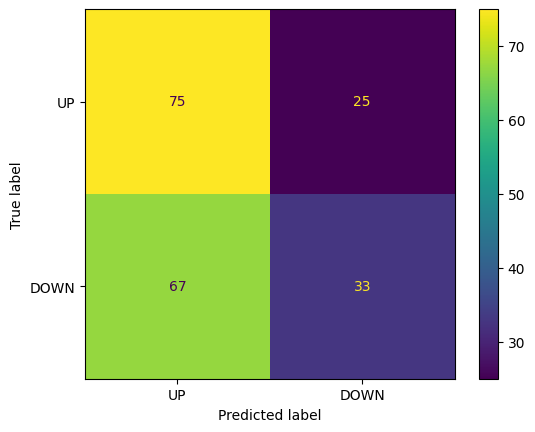

In [ ]:
twitter4two = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_twitter_gpt_4.csv')['two_shot'].values
score(twitter4two, twittertest, f'{filestamp}_twitter4two')

GPT3.5 twitter zeroshot

Numer of changes made: 0
200 200
f1_score0.625
Accuracy: 0.52
precision pos: 0.5128205128205128
precision neg: 0.5454545454545454
recall pos: 0.8
recall neg: 0.24


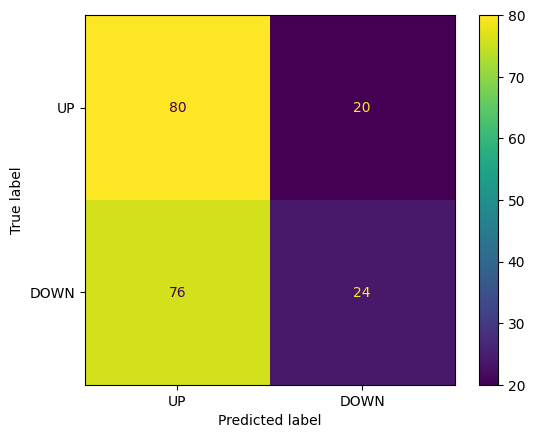

In [ ]:
twitter35zero = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_twitter_gpt_35_turbo_0125.csv')['zero_shot'].values
score(twitter35zero, twittertest, f'{filestamp}_twitter35zero')


GPT3.5 twitter twoshot

Numer of changes made: 0
199 200
f1_score0.6024096385542169
Accuracy: 0.505
precision pos: 0.5033557046979866
precision neg: 0.5098039215686274
recall pos: 0.75
recall neg: 0.26


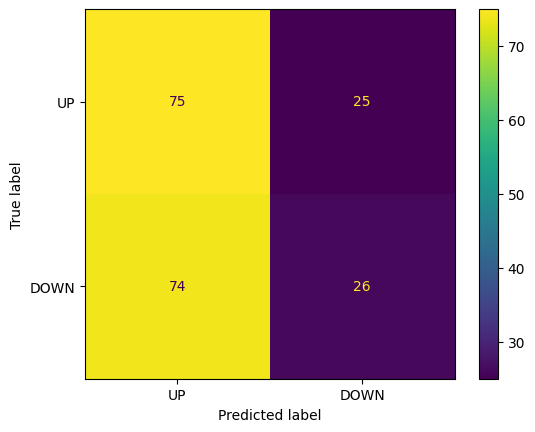

In [ ]:
twitter35two = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_twitter_gpt_35_turbo_0125.csv')['two_shot'].values
score(twitter35two, twittertest, f'{filestamp}_twitter35two')


# News


Phi news base

Numer of changes made: 159
0 200
f1_score0.1132075471698113
Accuracy: 0.06
precision pos: 0.10714285714285714
precision neg: 0.0
recall pos: 0.12
recall neg: 0.0


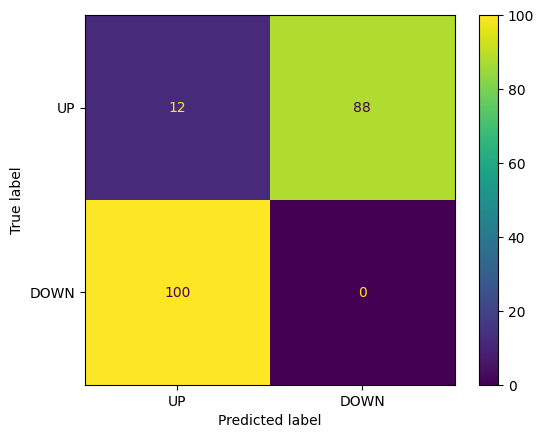

In [ ]:
newsphi2base = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_news_microsoft_phi_2.csv')['base'].values
score(newsphi2base, newstest, f'{filestamp}_newsphi2base')

Phi news base + adapter

Numer of changes made: 0
0 200
f1_score0.5974025974025975
Accuracy: 0.535
precision pos: 0.5267175572519084
precision neg: 0.5507246376811594
recall pos: 0.69
recall neg: 0.38


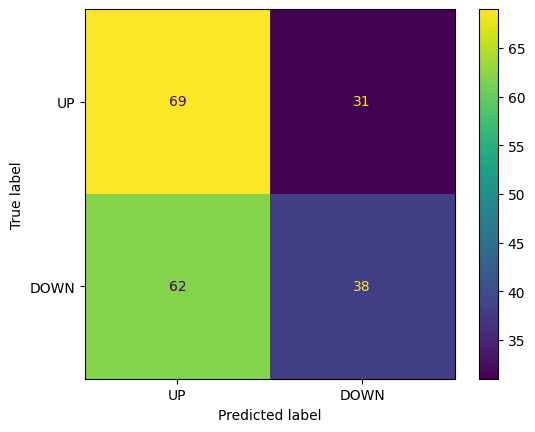

In [ ]:
newsphi2adapter = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_news_microsoft_phi_2_adapter.csv')['trained'].values
score(newsphi2adapter, newstest, f'{filestamp}_newsphi2adapter')

Phi news qbase

Numer of changes made: 158
0 200
f1_score0.1132075471698113
Accuracy: 0.06
precision pos: 0.10714285714285714
precision neg: 0.0
recall pos: 0.12
recall neg: 0.0


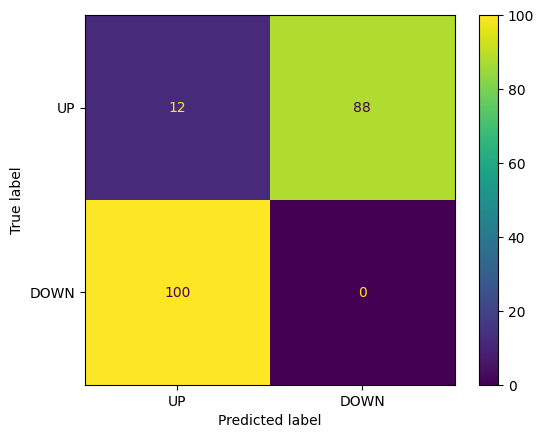

In [ ]:
newsphi2qbase = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_news_qmicrosoft_phi_2.csv')['base'].values
score(newsphi2qbase, newstest, f'{filestamp}_newsphi2qbase')

Phi news qbase + adapter

Numer of changes made: 0
0 200
f1_score0.5533980582524272
Accuracy: 0.54
precision pos: 0.5377358490566038
precision neg: 0.5425531914893617
recall pos: 0.57
recall neg: 0.51


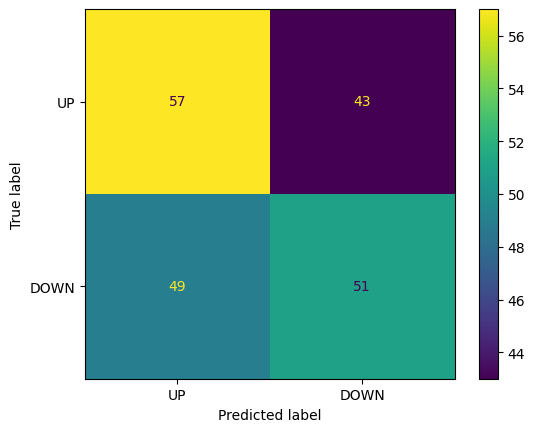

In [ ]:
newsphi2qadapter = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_news_qmicrosoft_phi_2_adapter.csv')['trained'].values
score(newsphi2qadapter, newstest, f'{filestamp}_newsphi2qadapter')

GPT4 news zeroshot

Numer of changes made: 44
156 200
f1_score0.49586776859504134
Accuracy: 0.39
precision pos: 0.4225352112676056
precision neg: 0.3103448275862069
recall pos: 0.6
recall neg: 0.18


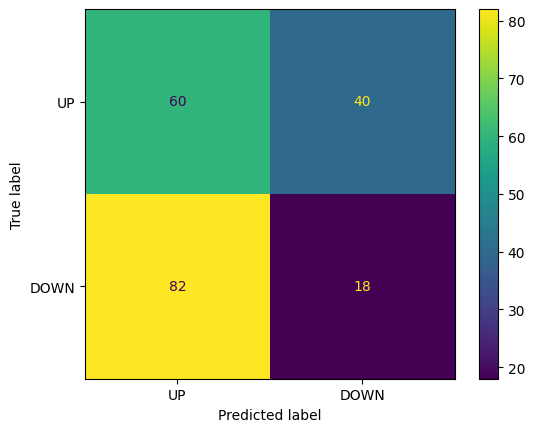

In [ ]:
news4zero = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_news_gpt_4.csv')['zero_shot'].values
score(news4zero, newstest, f'{filestamp}_news4zero')

GPT4 news twoshot

Numer of changes made: 0
200 200
f1_score0.648854961832061
Accuracy: 0.54
precision pos: 0.5246913580246914
precision neg: 0.6052631578947368
recall pos: 0.85
recall neg: 0.23


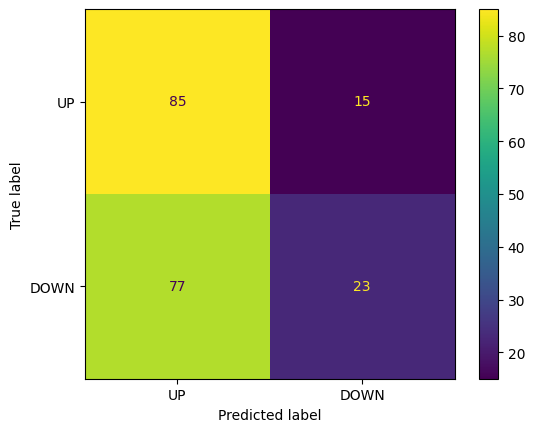

In [ ]:
news4two = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_news_gpt_4.csv')['two_shot'].values
score(news4two, newstest, f'{filestamp}_news4two')

GPT3.5 news zeroshot

Numer of changes made: 0
200 200
f1_score0.633587786259542
Accuracy: 0.52
precision pos: 0.5123456790123457
precision neg: 0.5526315789473685
recall pos: 0.83
recall neg: 0.21


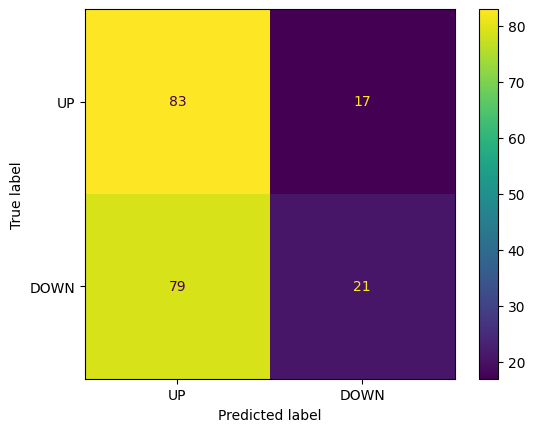

In [ ]:
news35zero = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_news_gpt_35_turbo_0125.csv')['zero_shot'].values
score(news35zero, newstest, f'{filestamp}_news35zero')

GPT3.5 news twoshot

Numer of changes made: 0
200 200
f1_score0.5585585585585586
Accuracy: 0.51
precision pos: 0.5081967213114754
precision neg: 0.5128205128205128
recall pos: 0.62
recall neg: 0.4


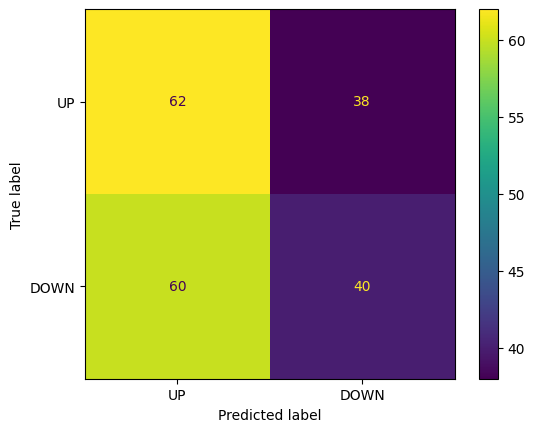

In [ ]:
news35two = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_news_gpt_35_turbo_0125.csv')['two_shot'].values
score(news35two, newstest, f'{filestamp}_news35two')


# Mix

Phi2 mix base

Numer of changes made: 82
0 200
f1_score0.4067796610169491
Accuracy: 0.3
precision pos: 0.35294117647058826
precision neg: 0.1875
recall pos: 0.48
recall neg: 0.12


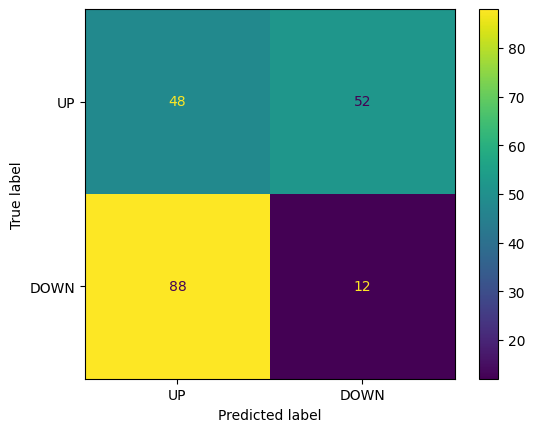

In [9]:
mixphi2base = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_mix_microsoft_phi_2.csv')['base'].values
score(mixphi2base, mixtest, f'{filestamp}_mixphi2base')

PHI2 mix base + adapter

Numer of changes made: 0
0 200
f1_score0.5650224215246638
Accuracy: 0.515
precision pos: 0.5121951219512195
precision neg: 0.5194805194805194
recall pos: 0.63
recall neg: 0.4


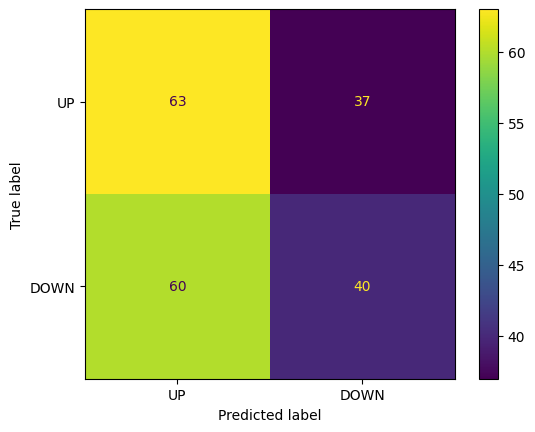

In [11]:
mixphi2adapter = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_mix_microsoft_phi_2_adapter.csv')['trained'].values
score(mixphi2adapter, mixtest, f'{filestamp}_mixphi2adapter')

Phi2 mix quantized base

Numer of changes made: 80
0 200
f1_score0.39823008849557523
Accuracy: 0.32
precision pos: 0.35714285714285715
precision neg: 0.25675675675675674
recall pos: 0.45
recall neg: 0.19


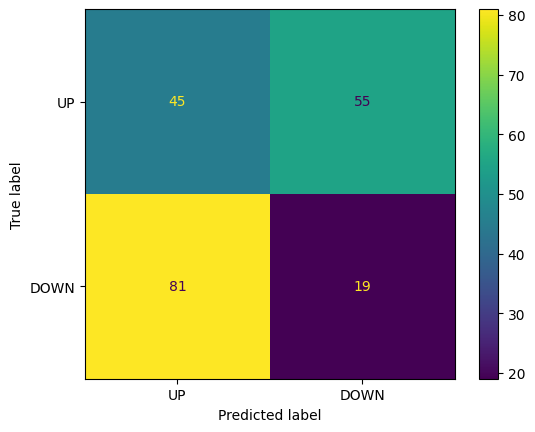

In [12]:
mixphi2qbase = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_mix_qmicrosoft_phi_2.csv')['base'].values
score(mixphi2qbase, mixtest, f'{filestamp}_mixphi2qbase')

Phi2 mix quantized base + adapter

Numer of changes made: 0
0 200
f1_score0.508108108108108
Accuracy: 0.545
precision pos: 0.5529411764705883
precision neg: 0.5391304347826087
recall pos: 0.47
recall neg: 0.62


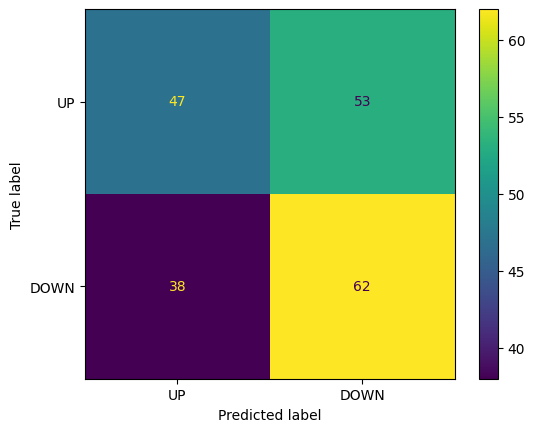

In [13]:
mixphi2qadapter = pd.read_csv(f'/content/drive/MyDrive/Thesis data/PHI_results/{filestamp}_mix_qmicrosoft_phi_2_adapter.csv')['trained'].values
score(mixphi2qadapter, mixtest, f'{filestamp}_mixphi2qadapter')

GPT-4 zero-shot mix

Numer of changes made: 45
155 200
f1_score0.48068669527897
Accuracy: 0.395
precision pos: 0.42105263157894735
precision neg: 0.34328358208955223
recall pos: 0.56
recall neg: 0.23


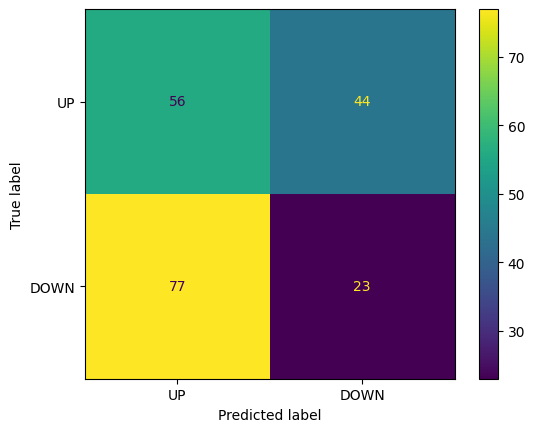

In [16]:
mix4zero = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_mix_gpt_4.csv')['zero_shot'].values
score(mix4zero, mixtest, f'{filestamp}_mix4zero')

Numer of changes made: 0
200 200
f1_score0.5983606557377048
Accuracy: 0.51
precision pos: 0.5069444444444444
precision neg: 0.5178571428571429
recall pos: 0.73
recall neg: 0.29


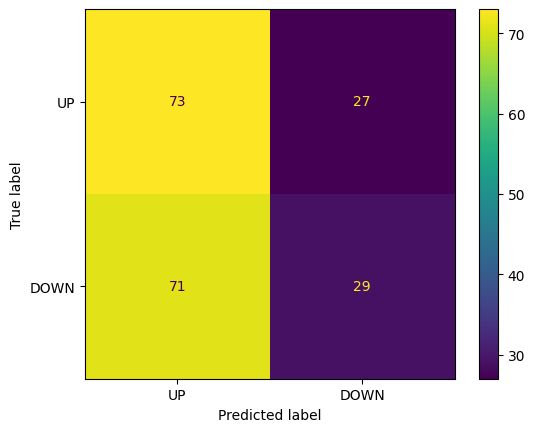

In [17]:
mix4two = pd.read_csv(f'/content/drive/MyDrive/Thesis data/gpt_results/{filestamp}_mix_gpt_4.csv')['two_shot'].values
score(mix4two, mixtest, f'{filestamp}_mix4two')